## XGBoost基础使用案例

分别使用原生XGBoost与sklearn接口

In [1]:
import numpy as np
from xgboost import XGBRegressor 
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


### 1.XGBoost的sklearn接口使用

以波斯顿房价预测为例

In [2]:
data = load_boston()
#波士顿数据集非常简单，但它所涉及到的问题却很多

In [3]:
X = data.data
y = data.target

In [4]:
X.shape

(506, 13)

In [5]:
y.shape


(506,)

In [6]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)


In [7]:
#如果开启参数slient：在数据巨大，预料到算法运行会非常缓慢的时候可以使用这个参数来监控模型的训练进度
reg = XGBRegressor(n_estimators=10,silent=True)#xgboost库silent=True不会打印训练进程，只返回运行结果，默认是False会打印训练进程
#sklearn库中的xgbsoost的默认为silent=True不会打印训练进程，想打印需要手动设置为False
-1*cross_val_score(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()#-92.67865836936579

[17:40:28] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:40:29] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:40:29] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { silent } might not be used

18.63373361656663

In [8]:
# sklearn 接口类型的可以使用网格搜索进行参数寻优
params={'n_estimators':[10,15,20],'learning_rate':[0.01,0.05,0.1]}
gs=GridSearchCV(reg,params,scoring='neg_mean_squared_error',cv=5)
gs.fit(Xtrain,Ytrain)
gs.best_score_

[17:40:29] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:40:29] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:40:29] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { silent } might not be used

-29.33950290131674

In [9]:
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 20}

### 2.原生XGBoost

In [10]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error

（1）回归案例

波斯顿房价预测

In [11]:
# 转换数据格式，转换成原生XGBoost可用的输入数据
dtrain=xgb.DMatrix(Xtrain,Ytrain)
dval=xgb.DMatrix(Xtest,Ytest)
dtest=xgb.DMatrix(Xtest)

# 设置参数
params={
    'booster':'gbtree',
    'objective':'reg:squarederror',
    'eval_metric':'rmse',
    'eta':0.1,
    'max_depth':5,
    'max_child_weight':2,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'lamada':2,
    'silent':True,
    'seed':78,
    'nthread':4
}

# 训练模型，设置early_stopping_rounds
xgb_model=xgb.train(params,dtrain,num_boost_round=100,evals=[(dtrain,'train'),(dval,'val')],
          early_stopping_rounds=10)

# 使用之前early的最好模型来预测数据
pred=xgb_model.predict(dtest,ntree_limit = xgb_model.best_ntree_limit)
# 打印rmse，发现与最佳迭代次数下的验证分数一致
np.sqrt(mean_squared_error(Ytest,pred))

[17:40:29] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { lamada, max_child_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:21.60119	val-rmse:21.82988
Multiple eval metrics have been passed: 'val-rmse' will be used for early stopping.

Will train until val-rmse hasn't improved in 10 rounds.
[1]	train-rmse:19.60818	val-rmse:19.85782
[2]	train-rmse:17.81069	val-rmse:18.06638
[3]	train-rmse:16.14939	val-rmse:16.41377
[4]	train-rmse:14.67223	val-rmse:14.91705
[5]	train-rmse:13.32242	val-rmse:13.56137
[6]	train-rmse:12.12406	val-rmse:12.39654
[7]	train-rmse:11.05886	val-rmse:11.33093
[8]	train-rmse:10.09247	val-rmse:10.38903
[9]	train-rmse:9.21344	val-rmse:9.51035
[

2.6985926833344767

In [12]:
cv_results=xgb.cv(params,dtrain,num_boost_round=100,nfold=5,metrics='rmse',
                  early_stopping_rounds=10,show_stdv=True)
cv_results

[17:40:30] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { lamada, max_child_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:40:30] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { lamada, max_child_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:40:30] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learn

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.604344,0.154689,21.614430,0.680082
1,19.608688,0.154659,19.637664,0.641466
2,17.809250,0.141333,17.862818,0.601395
3,16.193732,0.145944,16.255942,0.526859
4,14.729037,0.161677,14.853987,0.495764
5,13.407585,0.161175,13.587176,0.445971
6,12.210052,0.138132,12.422795,0.455973
7,11.146922,0.112751,11.400006,0.454691
8,10.166082,0.099982,10.492818,0.450861
9,9.275716,0.088854,9.662275,0.450199


In [13]:
# 使用之前交叉验证得到的最优次数进行训练模型
xgb_model=xgb.train(params,dtrain,num_boost_round=cv_results.shape[0])

# 预测
pred=xgb_model.predict(dtest)
# 打印rmse
np.sqrt(mean_squared_error(Ytest,pred))

[17:40:30] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { lamada, max_child_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




2.70465910324571

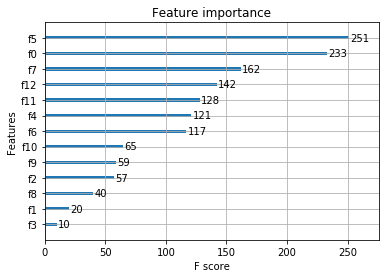

In [14]:
# 打印特征重要性
plot_importance(xgb_model)
plt.show()

（2）多分类问题

In [15]:
from sklearn.datasets import load_iris
data=load_iris()
x=data.data
y=data.target

In [16]:
x.shape

(150, 4)

In [17]:
y.shape

(150,)

In [18]:
np.unique(y)

array([0, 1, 2])

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=420)

In [20]:
from sklearn.metrics import accuracy_score

# 转换数据格式，转换成原生XGBoost可用的输入数据
dtrain=xgb.DMatrix(xtrain,ytrain)
dval=xgb.DMatrix(xtest,ytest)
dtest=xgb.DMatrix(xtest)

# 设置参数
params={
    'booster':'gbtree',
    'objective':'multi:softmax',
    'num_class':3,
    'eta':0.1,
    'max_depth':5,
    'max_child_weight':2,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'lamada':2,
    'silent':True,
    'seed':78,
    'nthread':4
}


In [21]:
# 训练模型，设置early_stopping_rounds
xgb_model=xgb.train(params,dtrain,num_boost_round=100,evals=[(dtrain,'train'),(dval,'val')],early_stopping_rounds=10)

# 使用之前early的最好模型来预测数据
pred=xgb_model.predict(dtest,ntree_limit = xgb_model.best_ntree_limit)
# 打印错误率
1-accuracy_score(ytest,pred)

[17:40:30] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { lamada, max_child_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-merror:0.01905	val-merror:0.04444
Multiple eval metrics have been passed: 'val-merror' will be used for early stopping.

Will train until val-merror hasn't improved in 10 rounds.
[1]	train-merror:0.01905	val-merror:0.06667
[2]	train-merror:0.00952	val-merror:0.04444
[3]	train-merror:0.00952	val-merror:0.04444
[4]	train-merror:0.00952	val-merror:0.04444
[5]	train-merror:0.00952	val-merror:0.04444
[6]	train-merror:0.00952	val-merror:0.04444
[7]	train-merror:0.00952	val-merror:0.04444
[8]	train-merror:0.00952	val-merror:0.04444
[9]	train-merror:0.

0.0444444444444444

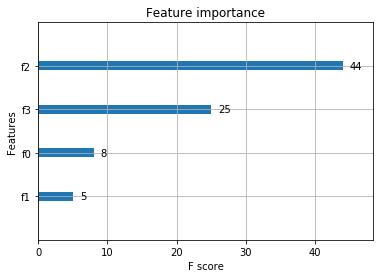

In [22]:
# 打印特征重要性
plot_importance(xgb_model)
plt.show()

（3）不平衡样本二分类问题

In [23]:
from sklearn.datasets import make_blobs #自创数据集

class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [24]:
X.shape

(550, 2)

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
(y == 1).sum() / y.shape[0] #9%

0.09090909090909091

In [27]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [28]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)
dtest = xgb.DMatrix(Xtest,Ytest)

In [29]:
#看看xgboost库自带的predict接口
param = {'silent':True,
         'objective':'binary:logistic',
         "eta":0.1,
         "scale_pos_weight":1}
num_round = 100

bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

[17:40:30] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [30]:
preds
# 可以发现其返回的是正样本的概率

array([0.00110357, 0.00761518, 0.00110357, 0.00110357, 0.93531454,
       0.00466839, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00410493, 0.00454478, 0.00571528, 0.00751026,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00712637, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00793251, 0.00466839,
       0.00110357, 0.00339395, 0.00657186, 0.00110357, 0.00457053,
       0.00571528, 0.0026763 , 0.00110357, 0.00110357, 0.00110357,
       0.00884932, 0.00712637, 0.00110357, 0.00712637, 0.00466839,
       0.00110357, 0.00110357, 0.00712637, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.63748044, 0.00110357, 0.00793251,
       0.00110357, 0.00451971, 0.00644181, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00751026, 0.00712637, 0.00110357,
       0.00866458, 0.00110357, 0.00110357, 0.00110357, 0.91610

In [31]:
# 设置0.5为阈值
ypred = preds.copy()
ypred[preds > 0.5] = 1
ypred[ypred != 1] = 0

ypred

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.], dtype=float32)

In [32]:
#样本不平衡时可以调节scale_pos_weight
from sklearn.metrics import accuracy_score as accuracy, recall_score as recall, roc_auc_score as auc

scale_pos_weight = [1,5,10]
for i in scale_pos_weight:
    param = {'silent':True,'objective':'binary:logistic'
            ,"eta":0.1,"scale_pos_weight":i}
    num_round = 100
    clf = xgb.train(param, dtrain, num_round)
    preds = clf.predict(dtest)
    ypred = preds.copy()
    ypred[preds > 0.5] = 1
    ypred[ypred != 1] = 0
    print('scale_pos_weight:',i)
    print("\tAccuracy:{}".format(accuracy(Ytest,ypred)))
    print("\tRecall:{}".format(recall(Ytest,ypred)))
    print("\tAUC:{}".format(auc(Ytest,preds)))

[17:40:30] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


scale_pos_weight: 1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9741902834008097
[17:40:30] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


scale_pos_weight: 5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538

可以发现scale_pos_weight越大，效果越好。

In [33]:
#当然我们也可以尝试不同的阈值
for thres in [0.3,0.5,0.7,0.9]:
    param= {'silent':True,'objective':'binary:logistic'
            ,"eta":0.1,"scale_pos_weight":10}
    clf = xgb.train(param, dtrain, num_round)
    preds = clf.predict(dtest)
    ypred = preds.copy()
    ypred[preds > thres] = 1
    ypred[ypred != 1] = 0
    print("thresholds:{}".format(thres))
    print("\tAccuracy:{}".format(accuracy(Ytest,ypred)))
    print("\tRecall:{}".format(recall(Ytest,ypred)))
    print("\tAUC:{}".format(auc(Ytest,preds)))

[17:40:31] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


thresholds:0.3
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9665991902834008
[17:40:31] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


thresholds:0.5
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9665991902834008
[17:40:31] W

发现0.5效果还是挺不错的，主要是scale_pos_weight的影响更为重要。

### 3.模型保存及加载

共有三种方式。

（1）XGBoost自带

In [34]:
data = load_boston()
X = data.data
y = data.target

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [35]:
dtrain=xgb.DMatrix(Xtrain,Ytrain)
dtest=xgb.DMatrix(Xtest)

# 设置参数
params={
    'booster':'gbtree',
    'objective':'reg:squarederror',
    'eval_metric':'rmse',
    'eta':0.1,
    'max_depth':5,
    'max_child_weight':2,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'lamada':2,
    'silent':True,
    'seed':78,
    'nthread':4
}

# 训练模型
xgb_model=xgb.train(params,dtrain,num_boost_round=100)
# 保存模型
xgb_model.save_model('./01.model')

#预测
pred=xgb_model.predict(dtest)
np.sqrt(mean_squared_error(Ytest,pred))

[17:40:31] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { lamada, max_child_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




2.6938745677047296

In [36]:
# 初始化模型并载入模型
xgb_model=xgb.Booster({'nthread':4})
xgb_model.load_model('./01.model')

#预测，发现预测分数与之前一致，说明成功保存并加载模型
pred=xgb_model.predict(dtest)
np.sqrt(mean_squared_error(Ytest,pred))

2.6938745677047296

 
（2）pickle保存载入

In [37]:
import pickle

#保存模型为二进制文件
pickle.dump(xgb_model, open("./02.dat","wb"))

In [38]:
#导入模型
loaded_model = pickle.load(open("./02.dat", "rb"))

#做预测
pred=loaded_model.predict(dtest)
np.sqrt(mean_squared_error(Ytest,pred))

2.6938745677047296

 
（2）joblib保存载入

In [39]:
import joblib

joblib.dump(xgb_model,"./03.dat")

['./03.dat']

In [40]:
#导入模型
loaded_model = joblib.load("./03.dat")

#做预测
pred=loaded_model.predict(dtest)
np.sqrt(mean_squared_error(Ytest,pred))

2.6938745677047296